In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import time 


# Data Preprocessing

In [2]:
images = {}

#load image woman
path = r"C:\Users\jules\OneDrive\Documents\Maastricht (DSDM)\Master\Year 1\Feb-June\Computer Vision\assignments\woman.png"
img = cv2.imread(path)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

images.update({'woman':img})

#load image japan
path = r"C:\Users\jules\OneDrive\Documents\Maastricht (DSDM)\Master\Year 1\Feb-June\Computer Vision\assignments\japan.png"
img = cv2.imread(path)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

images.update({'japan':img})

#load image japan
path = r"C:\Users\jules\OneDrive\Documents\Maastricht (DSDM)\Master\Year 1\Feb-June\Computer Vision\assignments\london.png"
img = cv2.imread(path)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

images.update({'london':img})

In [3]:
params = [[50, 5], [50, 1], [20, 5], [20,1]]

In [4]:
#implement the segmentation
def segmIm3D(img, r, threshold):
#     resized_img = cv2.resize(img, (0, 0), fx=0.25, fy=0.25)
    test_img = img
    
    #convert picture to the LAB colour space
    test_img_LAB = cv2.cvtColor(test_img, cv2.COLOR_RGB2LAB)
    
    #create 3xp matrix with the features
    h, w, c = test_img_LAB.shape #get composites
    ThreeD_f = test_img_LAB.reshape((h*w, c)) #reshape the features to get matrix (px3)
    
    #convert the depth to 8 bits per channel
    ThreeD_f = ThreeD_f.astype(np.int32)
    
    labels, segmented3Darray = meanshift(ThreeD_f, r, threshold)
    
    print("With radius ", r, " and threshold ",threshold, " we have ", len(np.unique(labels)), " segments.")
    
    # Reshape the flattened image data back to the original shape
    resized_img_LAB = segmented3Darray.reshape((h, w, c))
    
    # Convert the depth to 8 bits per channel
    resized_img_LAB = resized_img_LAB.astype(np.uint8)
    
    # Convert the LAB image back to RGB color space
    resized_img_RGB = cv2.cvtColor(resized_img_LAB, cv2.COLOR_LAB2RGB)

    # Convert the image data back to 8-bit unsigned integers
    resized_img_RGB = np.uint8(resized_img_RGB)
    
    
    return resized_img_RGB

In [5]:
#implement the segmentation
def segmIm5D(img, r, threshold):
   #     resized_img = cv2.resize(img, (0, 0), fx=0.25, fy=0.25)
    test_img = img
    
    #convert picture to the LAB colour space
    test_img_LAB = cv2.cvtColor(test_img, cv2.COLOR_RGB2LAB)
    
    #create 3xp matrix with the features
    h, w, c = test_img_LAB.shape #get composites
    ThreeD_f = test_img_LAB.reshape((h*w, c)) #reshape the features to get matrix (px3)
    
    #include image position information (x,y)
    x,y = np.meshgrid(np.arange(w), np.arange(h))
    FiveD_f = np.hstack((ThreeD_f, x.reshape(-1,1), y.reshape(-1,1)))
    
    labels, segmented5Darray = meanshift(FiveD_f, r, threshold)
    
    vectors_3D = segmented5Darray[:, :3]
    
    print("With radius ", r, " and threshold ",threshold, " we have ", len(np.unique(labels)), " segments.")
    
    # Reshape the flattened image data back to the original shape
    resized_img_LAB = vectors_3D.reshape((h, w, c))

    # Convert the depth to 8 bits per channel
    resized_img_LAB = resized_img_LAB.astype(np.uint8)
    
    # Convert the LAB image back to RGB color space
    resized_img_RGB = cv2.cvtColor(resized_img_LAB, cv2.COLOR_LAB2RGB)

    # Convert the image data back to 8-bit unsigned integers
    resized_img_RGB = np.uint8(resized_img_RGB)
    
    
    return resized_img_RGB

In [6]:
#implement the segmentation
def segmIm3D_opt(img, r, threshold):
    #     resized_img = cv2.resize(img, (0, 0), fx=0.25, fy=0.25)
    test_img = img
    
    #convert picture to the LAB colour space
    test_img_LAB = cv2.cvtColor(test_img, cv2.COLOR_RGB2LAB)
    
    #create 3xp matrix with the features
    h, w, c = test_img_LAB.shape #get composites
    ThreeD_f = test_img_LAB.reshape((h*w, c)) #reshape the features to get matrix (px3)
    
    #convert the depth to 8 bits per channel
    ThreeD_f = ThreeD_f.astype(np.int32)
    
    labels, segmented3Darray = meanshift_opt(ThreeD_f, r, threshold)
    
    print("With radius ", r, " and threshold ",threshold, " we have ", len(np.unique(labels)), " segments.")
    
    # Reshape the flattened image data back to the original shape
    resized_img_LAB = segmented3Darray.reshape((h, w, c))
    
    # Convert the depth to 8 bits per channel
    resized_img_LAB = resized_img_LAB.astype(np.uint8)
    
    # Convert the LAB image back to RGB color space
    resized_img_RGB = cv2.cvtColor(resized_img_LAB, cv2.COLOR_LAB2RGB)

    # Convert the image data back to 8-bit unsigned integers
    resized_img_RGB = np.uint8(resized_img_RGB)
    
    
    return resized_img_RGB

In [7]:
#implement the segmentation
def segmIm5D_opt(img, r, threshold):
    #     resized_img = cv2.resize(img, (0, 0), fx=0.25, fy=0.25)
    test_img = img
    
    #convert picture to the LAB colour space
    test_img_LAB = cv2.cvtColor(test_img, cv2.COLOR_RGB2LAB)
    
    #create 3xp matrix with the features
    h, w, c = test_img_LAB.shape #get composites
    ThreeD_f = test_img_LAB.reshape((h*w, c)) #reshape the features to get matrix (px3)
    
    #include image position information (x,y)
    x,y = np.meshgrid(np.arange(w), np.arange(h))
    FiveD_f = np.hstack((ThreeD_f, x.reshape(-1,1), y.reshape(-1,1)))
    
    labels, segmented5Darray = meanshift_opt(FiveD_f, r, threshold)
    
    vectors_3D = segmented5Darray[:, :3]
    
    print("With radius ", r, " and threshold ",threshold, " we have ", len(np.unique(labels)), " segments.")
    
    # Reshape the flattened image data back to the original shape
    resized_img_LAB = vectors_3D.reshape((h, w, c))

    # Convert the depth to 8 bits per channel
    resized_img_LAB = resized_img_LAB.astype(np.uint8)
    
    # Convert the LAB image back to RGB color space
    resized_img_RGB = cv2.cvtColor(resized_img_LAB, cv2.COLOR_LAB2RGB)

    # Convert the image data back to 8-bit unsigned integers
    resized_img_RGB = np.uint8(resized_img_RGB)
    
    
    return resized_img_RGB

# Mean Shift Algorithm


In [8]:
# compute euclidean distances

def euclidean_distance(x1, x2):
    distance = np.linalg.norm(x1 - x2)
    return distance

def euclidean_distances(point, points_list):
    distances = []
    distances = np.linalg.norm(points_list - point, axis=1)
    return distances

# get all points within the sphere of radius r around a given point
def get_points_in_window(data, data_point, r):
    distances = euclidean_distances(data_point, data)
    indices = np.where(distances < r)[0]
    points_in_window = data[indices]
    return points_in_window, indices

#get all points that are neighbours (that is close enough to data_point) but also get the indices to be able to optimize
def get_neighbours(data, data_point, alreadyTested, r):
    distances = euclidean_distances(data_point, data)
    indices = np.where((distances < r) & (alreadyTested == 0))[0]
    points_in_window = data[indices]
    return indices

In [9]:
#step1 : Find the peaks 
def findpeak(data, idx, r):
    
    #extract a chosen point
    data_point = data[idx] 
    
    #define the search window
    window, _ = get_points_in_window(data, data_point, r)
    
    peak = np.round(np.mean(window, axis=0)).astype(int) 
    
    return peak

In [10]:
#step2 : Implement Meanshift
def meanshift(data, r, threshold):
    #create a copy to keep track of the peak values
    peaks = data.copy()
    #initialize labels array
    labels = np.zeros(len(data))
    
     # Initialize a flag to track convergence
    converged = False

    while not converged:

        for i, point in enumerate(peaks):
            
            peak = findpeak(peaks, i, r)
           
            # Calculate the mean shift vector
            shift_vector = peak - point

            # Check if the magnitude of the shift vector is less than bandwidth/2
            if np.linalg.norm(shift_vector) < threshold:
                converged = True

            # Update the centroid
            peaks[i] += shift_vector 

    # Assign each pixel to the nearest peak
    # first group neighbouring peaks
    merged = np.zeros(len(peaks)) #array of booleans to avoid recalculating already grouped neighbours
    for i,peak in enumerate(peaks):
        if merged[i] == 1:
            #if the current peak was lready merged no need to do anything more
           continue
        merged[i] = 1
        #let's now check the rest of the array for neighbours
        indices = get_neighbours(peaks,peak,merged,r/2)

        if (len(indices) == 0):  #if no neighbour just set the label
            labels[i] = i  #poor lonesome pixel
        for idx in indices:
                    merged[idx] = 1 #mark as processed
                    peaks[idx] = peaks[i]    # align values as neighbours (note that first neighbour is always taken as commen value)
                    labels[idx] = i  # set the label to the closer neibour

    
    return labels, peaks

In [11]:
#step 3: speedups

#3.1 : Optimise meanshift
def meanshift_opt(data, r, threshold):
    # Create a copy to keep track of the peak values
    peaks = data.copy()
    #initialize labels array
    labels = np.zeros(len(data))

    # Initialize a flag to track convergence
    converged = False

    while not converged:
        # Create a copy of the peaks for updating
        # new_peaks = peaks.copy()
        # initialize an temporary arry
        new_peaks = np.zeros_like(peaks) 

        for i, point in enumerate(peaks):
            if (np.all(new_peaks[i] == 0 )) : #ONLY if not assigned yet (was not yet in a bassin of attraction)
                peak = findpeak(peaks, i, r)
                basin,indices = get_points_in_window(data, peak, r)

                if len(basin) > 0:
                    # Calculate the mean shift vector
                    shift_vector = peak - point

                    # Check if the magnitude of the shift vector is less than threshold
                    if np.linalg.norm(shift_vector) < threshold:
                        converged = True

                    # Update the new peak
                    new_peaks[indices] = peak

        # Update the peaks
        peaks = new_peaks

    # Assign each pixel to the nearest peak
    # first group neighbouring peaks
    merged = np.zeros(len(peaks)) #array of booleans to avoid recalculating already grouped neighbours
    for i,peak in enumerate(peaks):
        if merged[i] == 1:
            #if the current peak was lready merged no need to do anything more
           continue
        merged[i] = 1
        #let's now check the rest of the array for neighbours
        indices = get_neighbours(peaks,peak,merged,r/2)

        if (len(indices) == 0):  #if no neighbour just set the label
            labels[i] = i  #poor lonesome pixel
        for idx in indices:
                    merged[idx] = 1 #mark as processed
                    peaks[idx] = peaks[i]    # align values as neighbours (note that first neighbour is always taken as commen value)
                    labels[idx] = i  # set the label to the closer neibour
                    
    return labels, peaks
 

#3.2 : Optimise findpeaks
def findpeak_opt(data, idx, r, threshold, c=4):
    
    return cpts #cpts is s a vector storing a 1 for each point that is a distance of r/4 from the path and 0 otherwise

# Segmentation 3D

For the 3D:  woman
The parameters are: [50, 5]
With radius  50  and threshold  5  we have  12  segments.
Elapsed time: 1754.92 seconds
The parameters are: [50, 1]
With radius  50  and threshold  1  we have  12  segments.
Elapsed time: 1421.98 seconds
The parameters are: [20, 5]
With radius  20  and threshold  5  we have  93  segments.
Elapsed time: 1269.48 seconds
The parameters are: [20, 1]
With radius  20  and threshold  1  we have  93  segments.
Elapsed time: 1251.26 seconds
For the 3D:  japan
The parameters are: [50, 5]
With radius  50  and threshold  5  we have  7  segments.
Elapsed time: 1465.22 seconds
The parameters are: [50, 1]
With radius  50  and threshold  1  we have  7  segments.
Elapsed time: 1460.57 seconds
The parameters are: [20, 5]
With radius  20  and threshold  5  we have  62  segments.
Elapsed time: 1233.20 seconds
The parameters are: [20, 1]
With radius  20  and threshold  1  we have  62  segments.
Elapsed time: 1227.08 seconds
For the 3D:  london
The parameters a

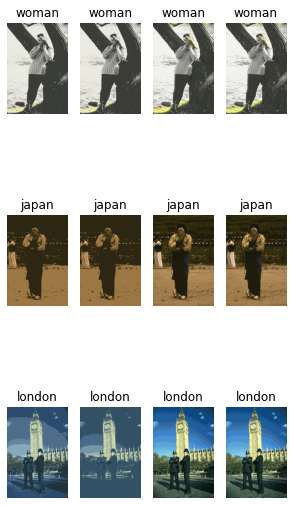

In [12]:
fig, axs = plt.subplots(3, 4, figsize=(5, 10))
for i, (name, image) in enumerate(images.items()):
    print("For the 3D: ",name)  
    
    for j, param in enumerate(params):
        print('The parameters are:', param)
        start_time = time.time()
        r = param[0]
        t = param[1]
        
        segmented_image = segmIm3D(image, r, t)

        # Get the current time after the function call
        end_time = time.time()

        # Calculate the elapsed time
        elapsed_time = end_time - start_time

        # Print the elapsed time
        print("Elapsed time: {:.2f} seconds".format(elapsed_time))

        axs[i,j].imshow(segmented_image)
        axs[i,j].set_axis_off()
        axs[i,j].set_title(name)
        
plt.show()   
        

# Segmentation 3D - Optimised

For the 3D:  woman
The parameters are: [50, 5]
With radius  50  and threshold  5  we have  7  segments.
Elapsed time: 1.15 seconds
The parameters are: [50, 1]
With radius  50  and threshold  1  we have  5  segments.
Elapsed time: 282.53 seconds
The parameters are: [20, 5]
With radius  20  and threshold  5  we have  41  segments.
Elapsed time: 1.88 seconds
The parameters are: [20, 1]
With radius  20  and threshold  1  we have  27  segments.
Elapsed time: 8.59 seconds
For the 3D:  japan
The parameters are: [50, 5]
With radius  50  and threshold  5  we have  3  segments.
Elapsed time: 245.00 seconds
The parameters are: [50, 1]
With radius  50  and threshold  1  we have  3  segments.
Elapsed time: 424.89 seconds
The parameters are: [20, 5]
With radius  20  and threshold  5  we have  34  segments.
Elapsed time: 1.70 seconds
The parameters are: [20, 1]
With radius  20  and threshold  1  we have  14  segments.
Elapsed time: 209.96 seconds
For the 3D:  london
The parameters are: [50, 5]
With r

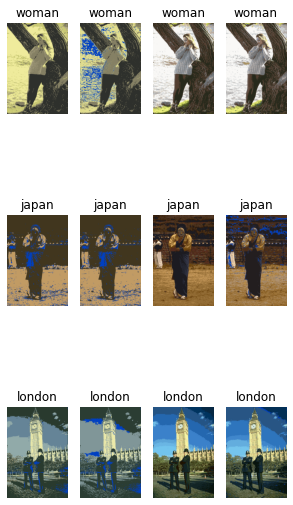

In [13]:
fig, axs = plt.subplots(3, 4, figsize=(5, 10))
for i, (name, image) in enumerate(images.items()):
    print("For the 3D opt: ",name)  
    
    for j, param in enumerate(params):
        print('The parameters are:', param)
        start_time = time.time()
        r = param[0]
        t = param[1]
        
        segmented_image = segmIm3D_opt(image, r, t)

        # Get the current time after the function call
        end_time = time.time()

        # Calculate the elapsed time
        elapsed_time = end_time - start_time

        # Print the elapsed time
        print("Elapsed time: {:.2f} seconds".format(elapsed_time))

        axs[i,j].imshow(segmented_image)
        axs[i,j].set_axis_off()
        axs[i,j].set_title(name)
        
plt.show()   
        

# Segmentation 5D

For the 3D:  woman
The parameters are: [50, 5]
With radius  50  and threshold  5  we have  547  segments.
Elapsed time: 1423.38 seconds
The parameters are: [50, 1]
With radius  50  and threshold  1  we have  547  segments.
Elapsed time: 1425.52 seconds
The parameters are: [20, 5]
With radius  20  and threshold  5  we have  5807  segments.
Elapsed time: 1441.55 seconds
The parameters are: [20, 1]
With radius  20  and threshold  1  we have  5807  segments.
Elapsed time: 1442.88 seconds
For the 3D:  japan
The parameters are: [50, 5]
With radius  50  and threshold  5  we have  404  segments.
Elapsed time: 1430.06 seconds
The parameters are: [50, 1]
With radius  50  and threshold  1  we have  187  segments.
Elapsed time: 2897.12 seconds
The parameters are: [20, 5]
With radius  20  and threshold  5  we have  4233  segments.
Elapsed time: 1555.63 seconds
The parameters are: [20, 1]
With radius  20  and threshold  1  we have  4233  segments.
Elapsed time: 4405.70 seconds
For the 3D:  london
Th

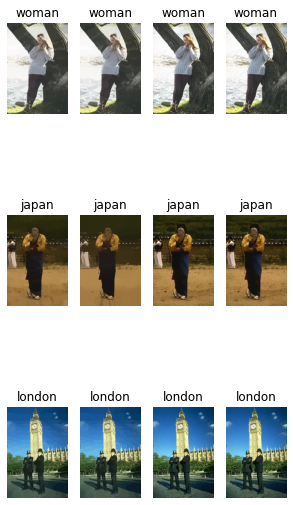

In [14]:
fig, axs = plt.subplots(3, 4, figsize=(5, 10))
for i, (name, image) in enumerate(images.items()):
    print("For the 5D: ",name)  
    
    for j, param in enumerate(params):
        print('The parameters are:', param)
        start_time = time.time()
        r = param[0]
        t = param[1]
        
        segmented_image = segmIm5D(image, r, t)

        # Get the current time after the function call
        end_time = time.time()

        # Calculate the elapsed time
        elapsed_time = end_time - start_time

        # Print the elapsed time
        print("Elapsed time: {:.2f} seconds".format(elapsed_time))

        axs[i,j].imshow(segmented_image)
        axs[i,j].set_axis_off()
        axs[i,j].set_title(name)
        
plt.show()   
        

# Segmentation 5D - Optimised

For the 3D:  woman
The parameters are: [50, 5]
With radius  50  and threshold  5  we have  225  segments.
Elapsed time: 7.69 seconds
The parameters are: [50, 1]
With radius  50  and threshold  1  we have  110  segments.
Elapsed time: 48.31 seconds
The parameters are: [20, 5]
With radius  20  and threshold  5  we have  2126  segments.
Elapsed time: 64.54 seconds
The parameters are: [20, 1]
With radius  20  and threshold  1  we have  2126  segments.
Elapsed time: 65.08 seconds
For the 3D:  japan
The parameters are: [50, 5]
With radius  50  and threshold  5  we have  86  segments.
Elapsed time: 43.14 seconds
The parameters are: [50, 1]
With radius  50  and threshold  1  we have  86  segments.
Elapsed time: 41.87 seconds
The parameters are: [20, 5]
With radius  20  and threshold  5  we have  1626  segments.
Elapsed time: 51.39 seconds
The parameters are: [20, 1]
With radius  20  and threshold  1  we have  1626  segments.
Elapsed time: 50.30 seconds
For the 3D:  london
The parameters are: [

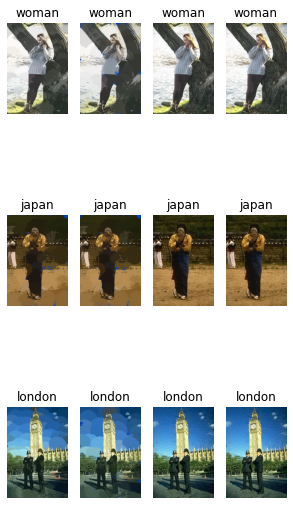

In [15]:
fig, axs = plt.subplots(3, 4, figsize=(5, 10))
for i, (name, image) in enumerate(images.items()):
    print("For the 5D opt: ",name)  
    
    for j, param in enumerate(params):
        print('The parameters are:', param)
        start_time = time.time()
        r = param[0]
        t = param[1]
        
        segmented_image = segmIm5D_opt(image, r, t)

        # Get the current time after the function call
        end_time = time.time()

        # Calculate the elapsed time
        elapsed_time = end_time - start_time

        # Print the elapsed time
        print("Elapsed time: {:.2f} seconds".format(elapsed_time))

        axs[i,j].imshow(segmented_image)
        axs[i,j].set_axis_off()
        axs[i,j].set_title(name)
        
plt.show()   
        